In [138]:
from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import pandas as pd
from urllib.request import urlopen
from highlight_text import fig_text
from matplotlib import rc, style, font_manager

font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgunbd.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

In [84]:
df = pd.read_csv("C:/박규영/축구포트폴리오/2023K리그데이터포털/전처리/2023_K리그_데이터최종본.csv", encoding='cp949')

In [85]:
df['전방패스성공률'] = round(df['전방패스성공']/df['전방패스 시도'],1) *100
df['공격지역패스성공률'] = round(df['공격지역패스성공']/df['공격지역패스시도'],1) *100
df['중거리패스성공률'] = round(df['중거리패스성공']/df['중거리패스시도'],1) *100
df['롱패스성공률'] = round(df['롱패스성공']/df['롱패스시도'],1) *100
df['크로스성공률'] = round(df['크로스성공']/df['크로스시도'],1) *100
df['키패스전환률'] = round(df['키패스']/df['전방패스성공'],1) * 100 
df['드리블성공률'] = round(df['드리블성공']/df['드리블시도'],1) * 100 

In [86]:
baek = df[df['선수명'] == '백성동']
reo = df[df['선수명'] == '레안드로']

In [87]:
col = ['키패스전환률','롱패스성공률','공격지역패스성공률','전방패스성공률',
       '중거리패스성공률','크로스성공률','크로스시도','드리블성공률']

baek = baek[col]
reo = reo[col]

In [88]:
# 필요한 선수 기록 리스트 반환

baek_array = baek[col].values
baek = [float(value) for value in baek_array[0]] # output_array[0]은 기존 출력의 첫리스트

reo_array = reo[col].values
reo = [float(value) for value in reo_array[0]]

In [112]:
player1_name = "백성동"
player2_name = "레안드로"

In [152]:
file_path = "C:/박규영/축구포트폴리오/흔비축.png"
fdj_cropped = Image.open(file_path)

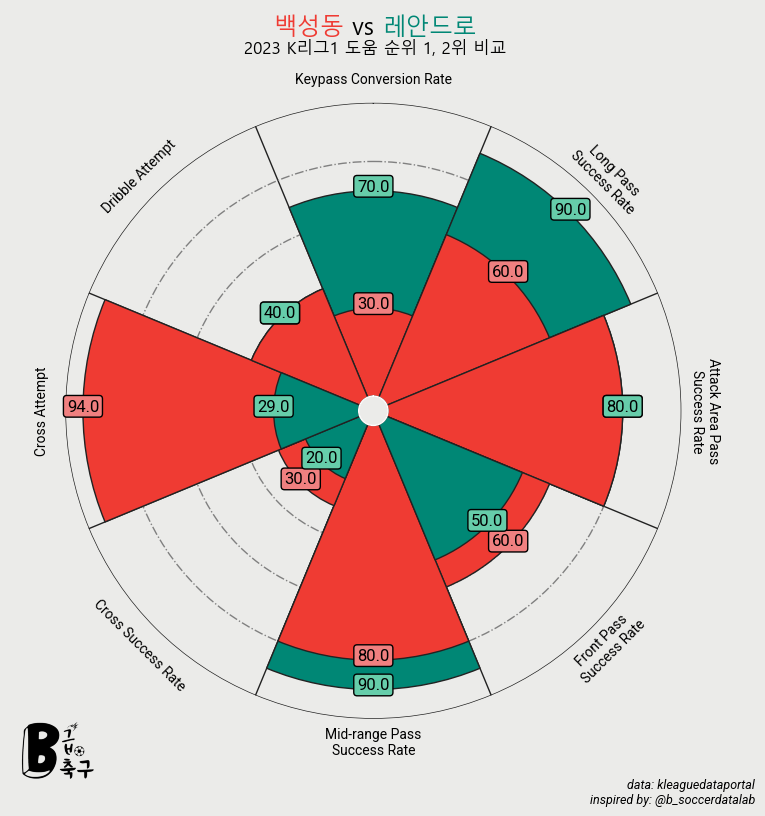

In [168]:
params_offset = [False, False, False, False, False, False, False, False]

params = ["Keypass Conversion Rate", "Long Pass\nSuccess Rate", "Attack Area Pass\nSuccess Rate", "Front Pass\nSuccess Rate",
       "Mid-range Pass\nSuccess Rate", "Cross Success Rate", "Cross Attempt", "Dribble Attempt"]

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    baek,                     # list of values
    compare_values=reo,    # comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#EF3B33", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#008775", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#000000", fontsize=10,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="lightcoral",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12, fontproperties=font_normal.prop, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="mediumaquamarine", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)


# adjust text for comparison-values-text
baker.adjust_texts(params_offset, offset=-0.17, adj_comp_values=True)

# add title
fig_text(
    0.515, 0.99, "<백성동> vs <레안드로>", size=17, fig=fig,
    highlight_textprops=[{"color": '#EF3B33'}, {"color": '#008775'}],
    ha="center", fontproperties=font_name, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "2023 K리그1 도움 순위 1, 2위 비교",
    size=12,
    ha="center", fontproperties=font_name, color="#000000"
)

# add credits
CREDIT_1 = "data: kleaguedataportal"
CREDIT_2 = "inspired by: @b_soccerdatalab"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.05, bottom=0.001, width=0.13, height=0.127
)

plt.show()